In [21]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pydot
import graphviz
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import TensorBoard

In [26]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

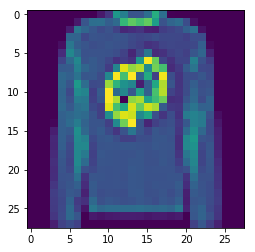

(60000, 28, 28)


In [27]:
image_shape = (28, 28, 1)
input_shape=[None,28,28,1]

#Hyper parameters
batch_size = 128
num_classes = 10
epochs = 12

image = X_train[123, :].reshape((28, 28))

plt.imshow(image)
plt.show()

print(X_train.shape)

In [28]:
# scale data to the range of [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


# Further spliting training data into train / validation sets (# put 10000 into validation set and keep remaining 50,000 for train)
(X_train, X_cv) = X_train[10000:], X_train[:10000] 
(y_train, y_cv) = y_train[10000:], y_train[:10000]



In [29]:
# Reshape input data to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_cv = X_cv.reshape(X_cv.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_cv = tf.keras.utils.to_categorical(y_cv,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

#Print the sizes and shapes
print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_cv shape: {}'.format(X_cv.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))
print('y_cv shape: {}'.format(y_cv.shape))

x_train shape: (50000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_cv shape: (10000, 28, 28, 1)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
y_cv shape: (10000, 10)


In [30]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_cv, y_cv))
#model.fit(X_train, y_train, validation_data=(X_cv, y_cv),, batch_size=128, epochs=12, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 209s 4ms/step - loss: 0.5386 - acc: 0.8083 - val_loss: 0.3348 - val_acc: 0.8783
Epoch 2/12
50000/50000 [==============================] - 209s 4ms/step - loss: 0.3865 - acc: 0.8589 - val_loss: 0.3073 - val_acc: 0.8894
Epoch 3/12
50000/50000 [==============================] - 210s 4ms/step - loss: 0.3675 - acc: 0.8642 - val_loss: 0.2974 - val_acc: 0.8878
Epoch 4/12
50000/50000 [==============================] - 209s 4ms/step - loss: 0.3422 - acc: 0.8741 - val_loss: 0.2894 - val_acc: 0.8903
Epoch 5/12
50000/50000 [==============================] - 210s 4ms/step - loss: 0.3275 - acc: 0.8800 - val_loss: 0.2796 - val_acc: 0.8977
Epoch 6/12
50000/50000 [==============================] - 210s 4ms/step - loss: 0.3181 - acc: 0.8824 - val_loss: 0.2789 - val_acc: 0.8971
Epoch 7/12
50000/50000 [==============================] - 209s 4ms/step - loss: 0.3107 - acc: 0.8834 - val_loss: 0.2853 - 

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30049304859638215
Test accuracy: 0.8948


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________